In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import math
import random
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from itertools import cycle
import sounddevice as sd
import time

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


Importujeme potrebné knižnice a nastavíme štýl zobrazovania grafov.

In [3]:
fn_wav = os.path.join('..', 'git','sounds', 'AcGtr.wav')
x, Fs = librosa.load(fn_wav, sr=None)

N = len(x)
Ts = 1/Fs
t = np.dot(np.arange(0, N-1) , Ts)

rohdB = -3
roh = pow(10, (rohdB/20))
xPeak = max(abs(x))
xN = (roh/xPeak) * x

Počet vzoriek v súbore je uložený v premennej N, časový krok medzi vzorkami je uložený v premennej Ts a časová os je uložená v premennej t. Premenná rohdB obsahuje úroveň šumu meranú v decibeloch (dB) a premenná roh obsahuje jeho amplitúdu. Premenná xPeak obsahuje maximálnu hodnotu amplitúdy vo výstupnom signáli a xN je signál so zníženou amplitúdou, aby sa zabránilo preťaženiu.

In [7]:
w = np.random.rand(N, 1)
rohdB = -1
roh = pow(10, (rohdB/20))
wPeak = max(abs(w))
wN = (roh/wPeak) * w
w = w.flatten()
wN = w.flatten()
y = xN[:N] + wN[:N]

Táto časť kódu spracováva prijatý signál. Najprv sa pre signál vytvorí biely šum a normalizuje sa, potom sa šum pridá k pôvodnému signálu s príslušným koeficientom oslabenia.

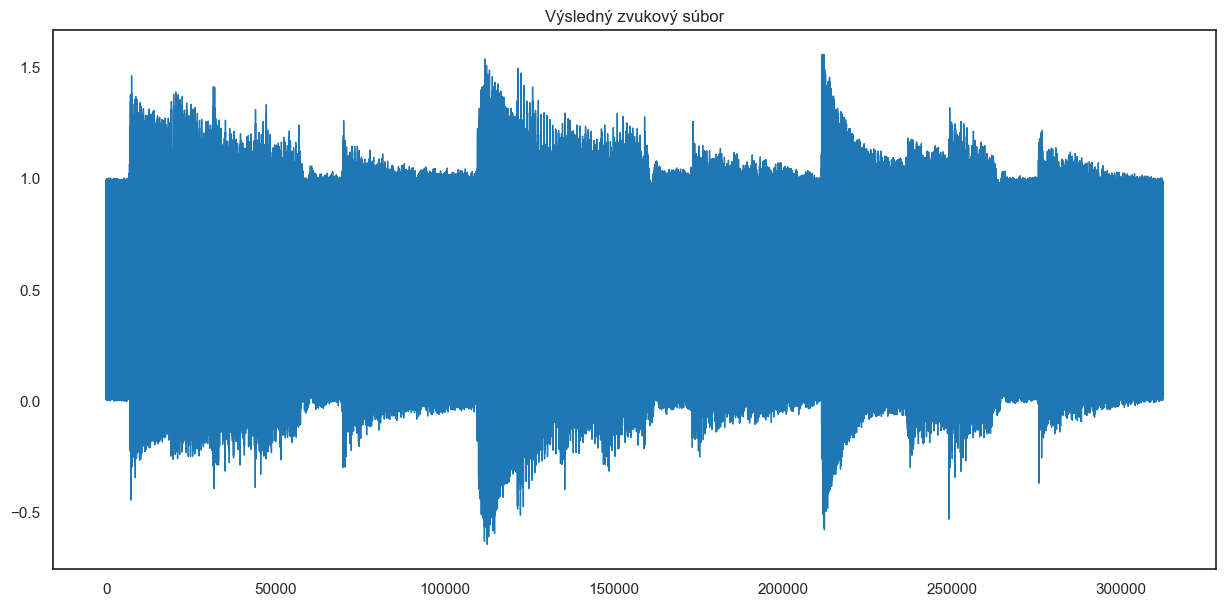

In [5]:
pd.Series(y).plot(figsize=(15,7),
                  lw=1,
                  title='Výsledný zvukový súbor',
                  color=color_pal[0])
plt.show()

Graf zobrazuje výsledok miešania bieleho šumu a zvukového súboru

In [8]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/AcGtr.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(x, Fs)
time.sleep(seconds_duration + 1)
sd.play(y, Fs)